### Make two folders: images, masks

```
data_processedv0/
                images/
                masks/
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import skimage.draw
import numpy as np
from tqdm import tqdm
import cv2
from glob import glob
import warnings
import random
warnings.filterwarnings('ignore')

%matplotlib inline

# Helpers

def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)
        
        
        
def read_nuclei(path):
    "Read raw data"

    # Load 4-channel image
    if len(path) == 0:
        return None
    
    img = skimage.io.imread(path)
    
    # input image
    if len(img.shape) > 2:
        img = img[:,:,:3]
    # mask
    else:
        # do nothing
        pass
        
    return img



def save_nuclei(path, img):
    "save image"
    skimage.io.imsave(path, img)
    
    
    
label_map = {'Epithelial':1,
             'Lymphocyte':2,
             'Macrophage':4,
             'Neutrophil':3,
            }


# Root directory of the project
ROOT_DIR = os.path.abspath(".")
print(ROOT_DIR)
# Training file directory
IMAGES_FOLDER = os.path.join(ROOT_DIR, "dataset", "MoNuSAC_images_and_annotations/")
MASKS_FOLDER = os.path.join(ROOT_DIR, "dataset", "MoNuSAC_masks/")
print(IMAGES_FOLDER, MASKS_FOLDER)

/home/hasib/MoNuSAC-ISBI-2020
/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/ /home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/


In [2]:
IMAGES_DEST =  os.path.join(ROOT_DIR, "dataset", "data_processedv0", "images/")
MASKS_DEST = os.path.join(ROOT_DIR, "dataset", "data_processedv0", "masks/")

print(IMAGES_DEST)
print(MASKS_DEST)

# Create folders
create_directory(IMAGES_DEST)
create_directory(MASKS_DEST)

/home/hasib/MoNuSAC-ISBI-2020/dataset/data_processedv0/images/
/home/hasib/MoNuSAC-ISBI-2020/dataset/data_processedv0/masks/


In [3]:
IMAGES_SUB_FOLDER = [os.path.join(IMAGES_FOLDER, i) for i in sorted(next(os.walk(IMAGES_FOLDER))[1])]
IMAGES_SUB_FOLDER[:5]

#IMAGES_SUB_FOLDER = sorted([os.path.join(IMAGES_FOLDER, i) for i in os.walk(IMAGES_FOLDER)])
#IMAGES_SUB_FOLDER[:5]

['/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-55-1594-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-5P-A9K0-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-69-7760-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-69-A59K-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-73-4668-01Z-00-DX1']

In [4]:
MASKS_SUB_FOLDER = [os.path.join(MASKS_FOLDER, i) for i in sorted(next(os.walk(MASKS_FOLDER))[1])]
MASKS_SUB_FOLDER[:5]

#MASKS_SUB_FOLDER = sorted([os.path.join(MASKS_FOLDER, i) for i in os.listdir(MASKS_FOLDER)])
#MASKS_SUB_FOLDER[:5]

['/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-55-1594-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-5P-A9K0-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-69-7760-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-69-A59K-01Z-00-DX1',
 '/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-73-4668-01Z-00-DX1']

In [5]:
a = sorted(next(os.walk(IMAGES_FOLDER))[1])
b = sorted(next(os.walk(MASKS_FOLDER))[1])
print(a[:2], b[:2])

for x,y in zip(a,b):
    if x == y:
        print(True)
    else:
        print(False)

['TCGA-55-1594-01Z-00-DX1', 'TCGA-5P-A9K0-01Z-00-DX1'] ['TCGA-55-1594-01Z-00-DX1', 'TCGA-5P-A9K0-01Z-00-DX1']
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [6]:
ct = 10
print(IMAGES_SUB_FOLDER[ct])
print(MASKS_SUB_FOLDER[ct])

/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_images_and_annotations/TCGA-B6-A0WZ-01Z-00-DX1
/home/hasib/MoNuSAC-ISBI-2020/dataset/MoNuSAC_masks/TCGA-B6-A0WZ-01Z-00-DX1


### Process raw data to initial version

In [7]:
### MAIN#########

images = []
masks = []

iterator = 0

raw_ct = 0
gt_ct = 0
for ct in tqdm(range(len(IMAGES_SUB_FOLDER[:]))):
    #print(ct)
    
    #print(IMAGES_SUB_FOLDER[ct], MASKS_SUB_FOLDER[ct])

    # Read all raw images in image sub folder
    all_imgs = sorted(glob(IMAGES_SUB_FOLDER[ct] + '/*.tif'))

    # Read the mask sub folders
    all_mask_sub_dir = sorted(glob(MASKS_SUB_FOLDER[ct]+ '/*'))

    # Iterate over the individual raw images
    for i in range(len(all_imgs)):

        #print(i)
        img = read_nuclei(all_imgs[i])

        # Save it
        # .............
        
        save_nuclei(IMAGES_DEST+ "{}.png".format(raw_ct), img)
        raw_ct+=1
        
        #print(IMAGES_DEST+ "{}_{}.png".format(ct, i))
        
        # Add to list
        #images.append(img)

    # Iterate over the individual mask sub folders
    for j in range(len(all_mask_sub_dir)):

        # Go to each sub folder
        # Read the 4 class folders
        class_sub_dir = sorted(glob(all_mask_sub_dir[j]+ '/*'))  

        # Make list for masks from each class fodlers
        final_masks = []

        # For each class folder get the mask
        for i in range(len(class_sub_dir)):

            # get the mask in the subfolder
            mask_paths = sorted(glob(class_sub_dir[i] + '/*.tif'))

            # If more than one mask present in folder(maybe not)
            # For each class folder: 1) read the mask 2) Convert to class label from the binary class label
            for j in range(len(mask_paths)):

                if i == 0:
                    epithelial_mask = read_nuclei(mask_paths[j])
                    epithelial_mask = np.where(epithelial_mask==255.0, 1.0, epithelial_mask)
                    final_masks.append(epithelial_mask)

                if i == 1:
                    lymphocyte_mask = read_nuclei(mask_paths[j])
                    lymphocyte_mask = np.where(lymphocyte_mask==255.0, 2.0, lymphocyte_mask)
                    final_masks.append(lymphocyte_mask)
                if i == 2:
                    macrophage_mask = read_nuclei(mask_paths[j])
                    macrophage_mask = np.where(macrophage_mask==255.0, 4.0, macrophage_mask)
                    final_masks.append(macrophage_mask)
                if i == 3:
                    neutrophil_mask = read_nuclei(mask_paths[j])
                    neutrophil_mask = np.where(neutrophil_mask==255.0, 3.0, neutrophil_mask)
                    final_masks.append(neutrophil_mask)

                    
        # Overlay masks
        
        if len(final_masks) == 1:
            
            # If only one mask, read it directly
            mask = final_masks[0]
            
        else:
            
            # For multiple masks, read maximum along the axis
            #mask = np.maximum.reduce(*final_masks, dtype=np.float64)
            mask = np.amax(final_masks, axis=0)
            

        # Save it
        # .............

        mask = mask.astype(np.uint8)
        #print(mask.shape, ct, i, iterator)
        save_nuclei(MASKS_DEST + "{}.png".format(gt_ct), mask)
        gt_ct+=1
        
        iterator+=1

        # Add to list
        #masks.append(mask)
                
    
print(len(images), len(masks))

100%|██████████| 46/46 [00:53<00:00,  1.17s/it]

0 0


### Sanity check

Index:  94
183.png
(500, 786, 3) (500, 786)
Ground truth classes:  [0 1 2 3 4]


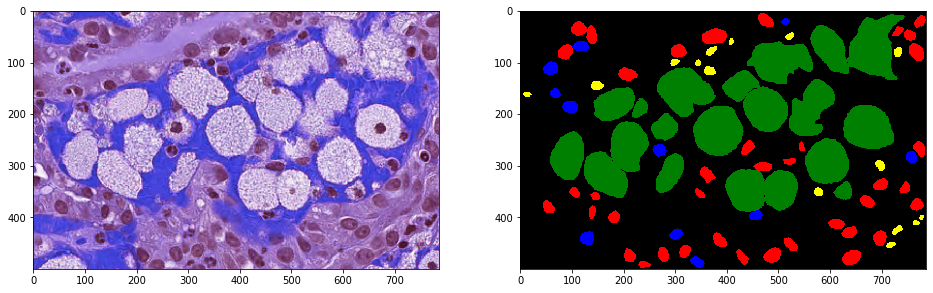

In [18]:
# Load a random image and mask
image_fns = sorted(next(os.walk(IMAGES_DEST))[2])
gt_fns = sorted(next(os.walk(MASKS_DEST))[2])

# Random index
idx = 94 #random.randrange(len(image_fns))
print("Index: ", idx)
print(image_fns[idx])
# Read image and mask
image = skimage.io.imread(os.path.join(IMAGES_DEST, image_fns[idx]))
gt = skimage.io.imread(os.path.join(MASKS_DEST, gt_fns[idx]))

# Test!
assert image.shape[:2] == gt.shape, "Wrong image or ground truth!"
assert image.dtype == gt.dtype, "Wrong data types!"
print(image.shape, gt.shape)

# Flatten to get unique -> different classes in the mask
val1 = gt.flatten()
print("Ground truth classes: ", np.unique(val1))


f, axarr = plt.subplots(1,2, figsize=(16,16))

norm=plt.Normalize(0,4) # 5 classes including BG
map_name = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","blue", "green"])
#map_name = 'magma'

# idx = 154 all classes
axarr[0].imshow(image, cmap=map_name, norm=norm)
axarr[1].imshow(gt, cmap=map_name, norm=norm)

In [9]:
# If using this block of code, run the primary for loop for two or three folder, for experimentation.

#f, axarr = plt.subplots(1,2, figsize=(16,16))
#ct = 3

#assert images[ct].shape[:-1] == masks[ct].shape
#axarr[0].imshow(images[ct])
#axarr[1].imshow(masks[ct])

#val = masks[ct].flatten()
#print("Uniques: ", np.unique(val))

Index:  20
Index:  102
Index:  177
Index:  156
Index:  69
Index:  168
Index:  147
Index:  165
Index:  87
Index:  12


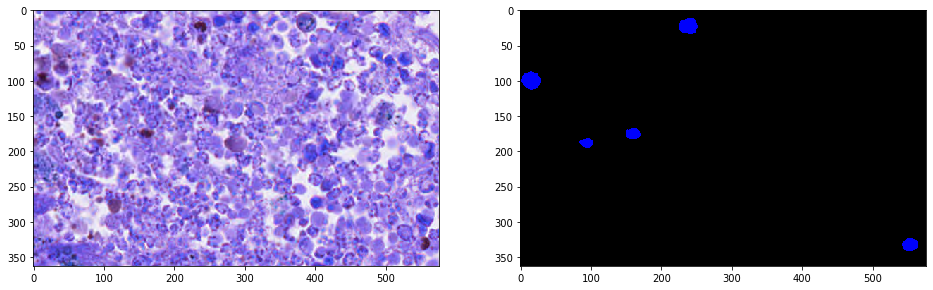

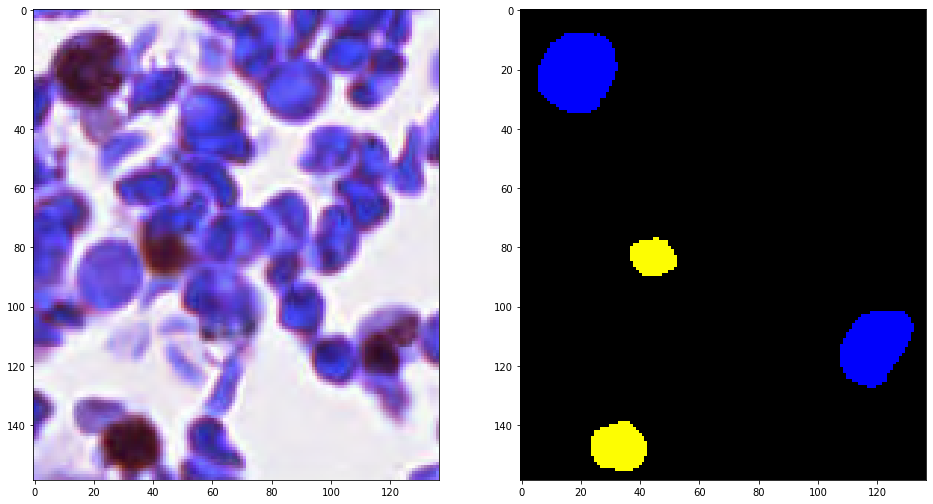

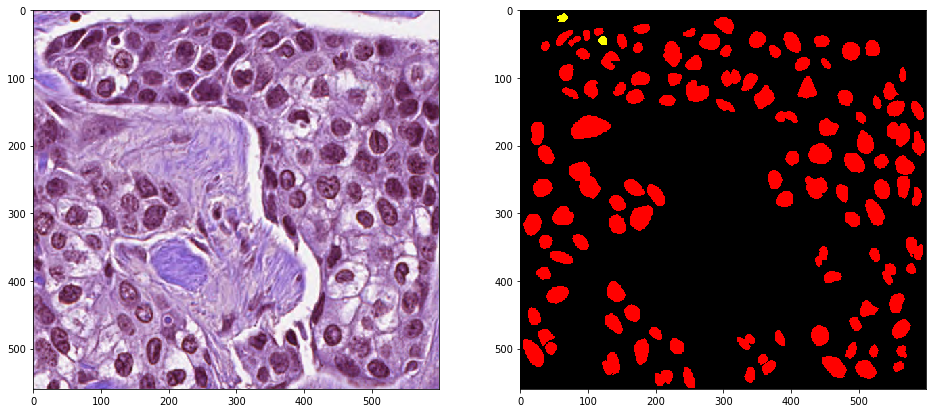

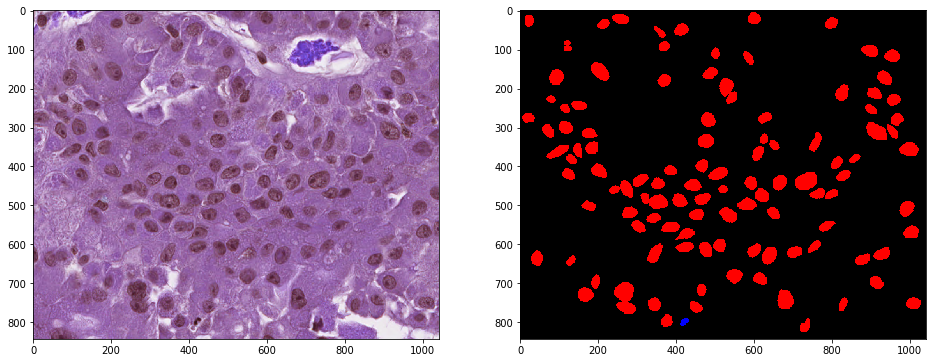

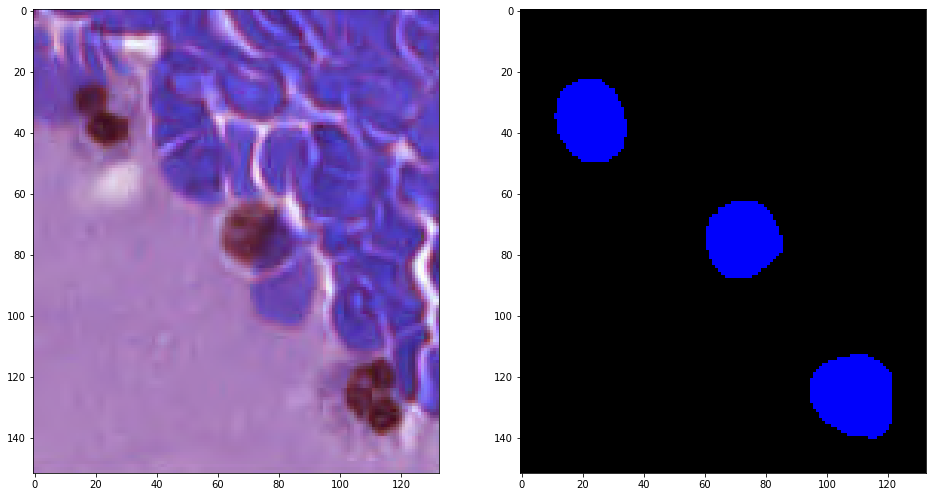

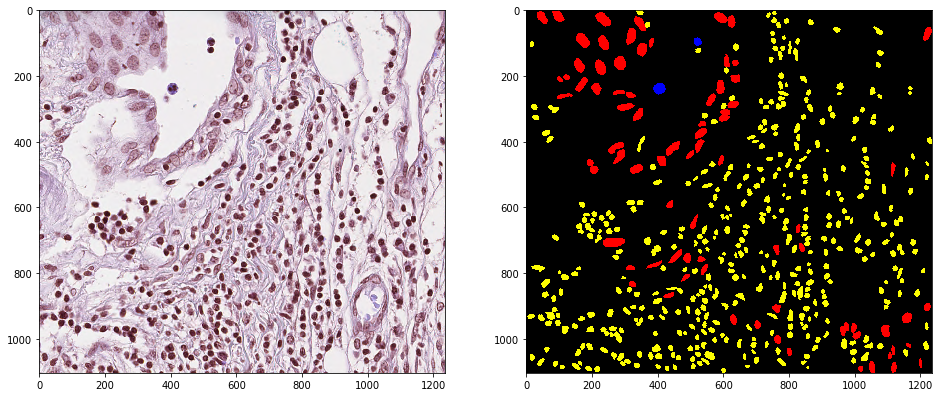

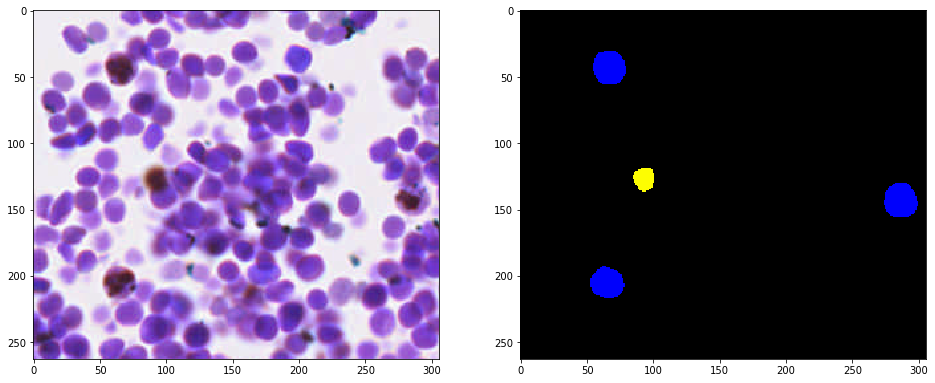

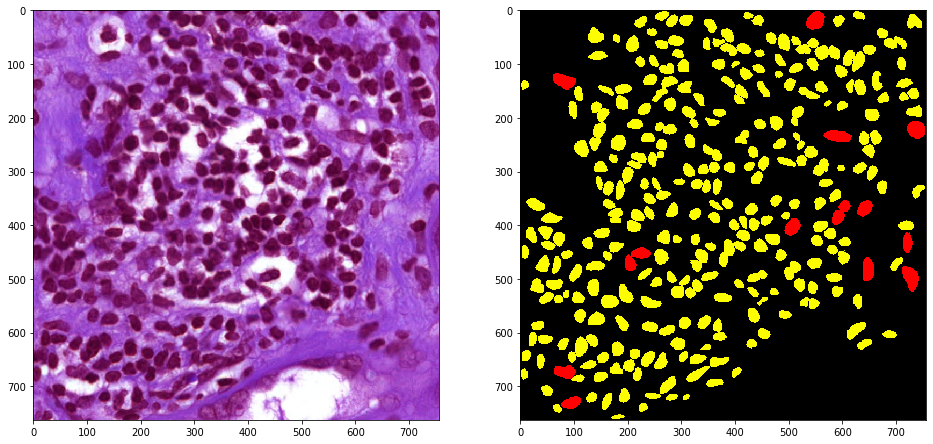

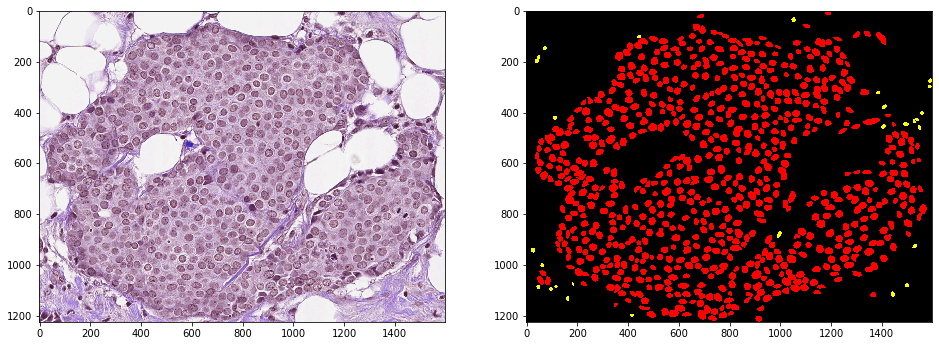

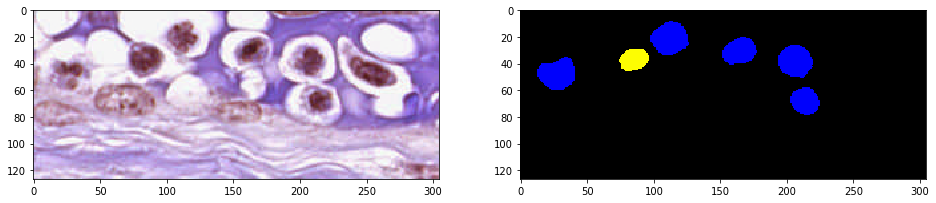

In [10]:
def process(image, mask):
    f, axarr = plt.subplots(1,2, figsize=(16, 16))
    axarr[0].imshow(image, cmap=map_name, norm=norm)
    axarr[1].imshow(mask, cmap=map_name, norm=norm)
    
#for img, msk in zip(images, masks):
#    process(img, msk)


#label_map = {'Epithelial':1,
#             'Lymphocyte':2,
#             'Macrophage':4,
#             'Neutrophil':3,
#            }


for i in range(10):
    
    idx = random.randrange(len(image_fns))
    print("Index: ", idx)
    
    image = skimage.io.imread(os.path.join(IMAGES_DEST, image_fns[idx]))
    gt = skimage.io.imread(os.path.join(MASKS_DEST, gt_fns[idx]))
    
    assert image.shape[:2] == gt.shape, "Wrong image or ground truth!"
    assert image.dtype == gt.dtype, "Wrong data types!"

    process(image, gt)